# Gradient Boost Model for Regression

In [2]:
import pandas as pd
auto_data = pd.read_csv('data/imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
import numpy as np
auto_data = auto_data.replace('?', np.nan)
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce') 
cylinders_dict = {'two': 2, 
                  'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)
auto_data = pd.get_dummies(auto_data, 
                           columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 
                                    'body-style', 'drive-wheels', 'engine-location', 
                                   'engine-type', 'fuel-system'])
auto_data = auto_data.dropna()
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


In [4]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

# Taking the labels (price)
Y = auto_data['price']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Gradient Boosting:

* Start off by learning a very simple model
* Take the error residuals from the first model and then try to predict the errors in the next iteration (also with a simple learner)
* Combine the two simple models to obtain a slightly better overall model
* At each iteration, the learner tries to reduce the errors (not eliminate it) by a certain learning rate. This is also the gradient of the model
* Keep iterating over the error residuals until you have an ensemble of simple learners which combine to produce a more complex model

Parameters:

- <b>n_estimators:</b> Number of boosting stages
- <b>max_depth:</b> Maximum depth of each estimator tree
- <b>min_samples_split: </b>Minimum samples in each subset when splitting the data set
- <b>learning_rate: </b>Defines the rate at which to converge to the optimal value
- <b>loss: </b>Type of loss function to optimize (ls == least squares)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)
gbr_model.score(X_train, Y_train)

0.9983862634096469

Populating the interactive namespace from numpy and matplotlib


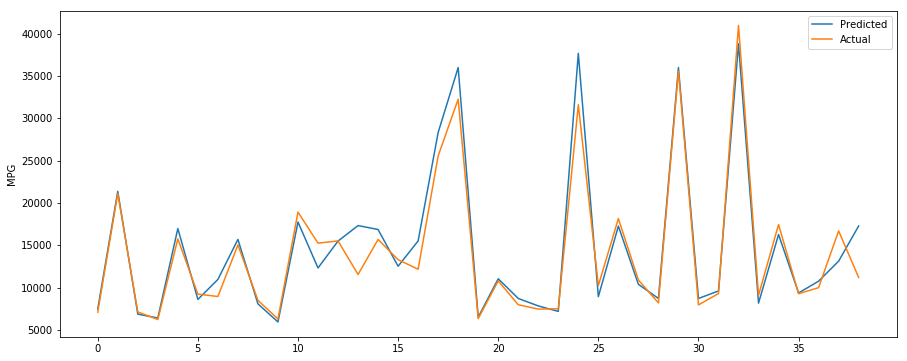

In [7]:
y_predict = gbr_model.predict(x_test)
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [8]:
r_square = gbr_model.score(x_test, y_test)
r_square

0.933558172221795

In [9]:
from sklearn.metrics import mean_squared_error

gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

4715613.582996478